In [1]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from PIL.ImageColor import colormap
from scipy.stats import linregress
import libraries as lib
import re

from libraries import plot_trajectory_map

In [2]:
#20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 
#Piloot: 
#Teun van den Elzen (72kg) (11:0
#Tristan Ploeger (80kg) (13:30-2
#Tomas Kramer (70kg) (20:00- 

#20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Folder: 
#Folders zijn weer begonnen vanaf mapje 1 vanwege het vervangen van de sd-kaart. 
#0002: Gaat het water in <--- 
#0003: Na opnieuw opstarten. 
#Piloot: 
#Tristan Ploeger (80kg) 
#Jonathan Meuleman (70kg) 

#20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Piloot: 
#Ruben Jans (77kg) 
#Bastiaan Buurman (75kg) 

#20240714_Limburg-Nijmegen\0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 m/s 
#Piloot: 
#Felix van Beusekom (78kg) (10:20-14:40) 
#Dennis van den Berg (73kg) (14:40-~17:30) 
#Jonathan Gessel (76kg) (~17:30-21:20) 

In [3]:
import os

# Definieer een lijst van datasets met hun directory en metadata
datasets = [
    {
        'directory': "../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel",
        'naam': "Huy-Limburg",
        'type': "terugvaart",
        'jaar': 2024
    },
    {
        'directory': "../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240714_Limburg-Nijmegen/0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent",
        'naam': "Limburg-Nijmegen",
        'type': "terugvaart",
        'jaar': 2024
    },
    {
        'directory': "../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone",
        'naam': "Valence",
        'type': "terugvaart",
        'jaar': 2024
    },
    {
        'directory': "../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors",
        'naam': "Anse Stroomafwaarts",
        'type': "terugvaart",
        'jaar': 2024
    },
]

print(datasets[3]['directory'])

../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors


In [4]:
result1 = lib.DataUitzoekenGui(datasets[0]['directory'])
result2 = lib.DataUitzoekenGui(datasets[1]['directory'])
result3 = lib.DataUitzoekenGui(datasets[2]['directory'])
result4 = lib.DataUitzoekenGui(datasets[3]['directory'])

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_05.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_07.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [5]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df1 = result1['merged_df'].copy()
    #merged_df1 = result2['merged_df'].copy()
    #merged_df3 = result3['merged_df'].copy()
    #merged_df4 = result4['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")

In [6]:
merged_df1

,1_Datalogger port,"1_Dataloggertijd, in s","1_MPPT-tijd, in s","1_Paneel 1 ingangsspanning, in V","1_Paneel 1 ingangsstroom, in I","1_Paneel 1 instantaan ingangsvermogen, in W","1_Paneel 1 totale ingangsenergie, in J","1_Paneel 2 ingangsspanning, in V","1_Paneel 2 ingangsstroom, in I","1_Paneel 2 instantaan ingangsvermogen, in W",...,"5_Gps-latitude, in graden",5_GPS richting,"5_Gps-tijd, in s",5_Format header (>05|05),"5_Paneel 1 ingangsspanning, in V","5_Uitgangsspanning, in V","5_Kanaal 1 instantaan uitgangsvermogen, in W","5_Gps-snelheid, in km/u",5_Pirano 1,5_Pirano 2
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:17,2.0,137.432109,1200.551736,20.520091,1.222273,43.175000,1.403547e+04,21.182909,1.216727,44.403455,...,5020.2014,9.7,60340.800000,05|07,-0.050,-0.166683,0.001,0.0,200,221
0 days 00:02:18,2.0,137.993885,1201.113462,20.557133,1.220663,43.513612,1.404957e+04,21.081939,1.220235,44.595745,...,5020.2014,9.7,60341.408163,05|07,-0.052,-0.165728,0.001,0.0,200,221
0 days 00:02:19,2.0,138.999369,1202.118929,20.635529,1.217696,43.665510,1.407482e+04,20.999480,1.225176,44.707304,...,5020.2014,9.7,60342.349057,05|07,-0.051,-0.165576,0.001,0.0,200,221
0 days 00:02:20,2.0,140.000394,1203.119943,20.715600,1.212442,43.540411,1.409996e+04,21.150800,1.218021,44.659474,...,5020.2014,9.7,60343.277228,05|07,-0.051,-0.165597,0.001,0.0,200,221
0 days 00:02:21,2.0,140.999270,1204.118814,20.637881,1.217366,43.537604,1.412506e+04,21.080851,1.222149,44.650535,...,5020.2014,9.7,60344.207547,05|07,-0.050,-0.165157,0.001,0.0,201,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:39:31,2.0,52770.997042,53833.132747,-0.083859,-0.017313,0.002424,1.355884e+06,-0.082424,-0.017576,0.002323,...,5110.7016,286.3,204054.030612,05|07,-0.043,-0.143247,0.001,0.0,-7,-8
0 days 14:39:32,2.0,52772.000473,53834.136150,-0.083960,-0.017560,0.002490,1.355884e+06,-0.082430,-0.017490,0.002280,...,5110.7016,286.3,204055.000000,05|07,-0.044,-0.144925,0.001,0.0,-7,-8
0 days 14:39:33,2.0,52773.003900,53835.139566,-0.083919,-0.017273,0.002444,1.355884e+06,-0.082646,-0.017525,0.002333,...,5110.7016,286.3,204055.979167,05|07,-0.042,-0.145139,0.001,0.0,-7,-8


In [7]:
merged_df1_zonder_sweeps = merged_df1.copy()
for i in range(1,int(10/2+1)):
    merged_df1_zonder_sweeps = merged_df1_zonder_sweeps[merged_df1_zonder_sweeps[f'{i}_Algoritme mode (kan per software generatie verschillend zijn)']==0].copy()
#for i in range(1,int(len(voltage_cols)/2+1)):
#    merged_df1 = merged_df1[merged_df1[f'{i}_Algoritme mode (kan per software generatie verschillend zijn)']<5]


In [8]:
merged_df1 = merged_df1_zonder_sweeps.copy()

In [9]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def identificeer_paneel_spanning_stroom(df):
    voltage_cols = []
    current_cols = []
    pattern_voltage = r'^\d+_Paneel \d+ ingangsspanning, in V$'
    pattern_current = r'^\d+_Paneel \d+ ingangsstroom, in I$'
    for col in df.columns:
        if re.match(pattern_voltage, col):
            voltage_cols.append(col)
        elif re.match(pattern_current, col):
            current_cols.append(col)
    return voltage_cols, current_cols

def bereken_paneel_vermogen(df, voltage_cols, current_cols):
    power_cols = []
    if len(voltage_cols) != len(current_cols):
        raise ValueError("Het aantal spanningskolommen komt niet overeen met het aantal stroomkolommen.")
    
    for v_col, i_col in zip(voltage_cols, current_cols):
        match_v = re.match(r'^(\d+)_Paneel (\d+) ingangsspanning, in V$', v_col)
        match_i = re.match(r'^(\d+)_Paneel (\d+) ingangsstroom, in I$', i_col)
        
        if match_v and match_i:
            mppt_num_v, paneel_num_v = match_v.groups()
            mppt_num_i, paneel_num_i = match_i.groups()
            
            if (mppt_num_v == mppt_num_i) and (paneel_num_v == paneel_num_i):
                power_col_name = f'{mppt_num_v}_Paneel {paneel_num_v} vermogen, in W'
                
                # Converteer spannings- en stroomkolommen naar numeriek
                df[v_col] = pd.to_numeric(df[v_col], errors='coerce')
                df[i_col] = pd.to_numeric(df[i_col], errors='coerce')
                
                # Bereken het vermogen en voeg het toe aan de DataFrame
                df[power_col_name] = df[v_col] * df[i_col]
                
                # Voeg de naam van de vermogenskolom toe aan de lijst
                power_cols.append(power_col_name)
            else:
                print(f"MPPT- of paneelnummer komt niet overeen tussen kolommen: {v_col} en {i_col}")
        else:
            print(f"Kolomnamen komen niet overeen met het verwachte patroon: {v_col}, {i_col}")
    
    return power_cols

def process_and_plot(dataset,df,N=5):
    directory = dataset['directory']
    naam = dataset['naam']
    type_terugvaart = dataset['type']
    jaar = dataset['jaar']
    
    # Laad je DataFrame
    # Zorg ervoor dat je het juiste bestand in de directory laadt
    # Bijvoorbeeld:
    # data_file = os.path.join(directory, 'jouw_data.csv')
    # merged_df = pd.read_csv(data_file)
    
    # Voor dit voorbeeld gebruik ik een lege DataFrame
    # Verwijder of vervang dit met de daadwerkelijke data
    merged_df = df  # Vervang dit door je daadwerkelijke DataFrame
    
    # Controleer of de DataFrame niet leeg is
    if merged_df.empty:
        print(f"DataFrame is leeg voor directory: {directory}")
        return
    
    # Stap 1: Identificeer de spannings- en stroomkolommen
    voltage_cols, current_cols = identificeer_paneel_spanning_stroom(merged_df)
    
    # Sorteer de lijsten om ervoor te zorgen dat de volgorde overeenkomt
    voltage_cols.sort()
    current_cols.sort()
    
    # Controleer welke kolommen zijn gevonden
    print(f"Gevonden spanningskolommen voor {naam}:")
    for col in voltage_cols:
        print(col)
    
    print(f"\nGevonden stroomkolommen voor {naam}:")
    for col in current_cols:
        print(col)
    
    # Stap 2: Bereken het vermogen en verkrijg de vermogenskolommen
    power_cols = bereken_paneel_vermogen(merged_df, voltage_cols, current_cols)
    
    # Controleer de nieuwe vermogenskolommen
    print(f"\nGevonden berekende vermogenskolommen voor {naam}:")
    for col in power_cols:
        print(col)
    
    # Stap 3: Verwijder rijen met NaN in spannings- of stroomkolommen
    merged_df.dropna(subset=voltage_cols + current_cols, inplace=True)
    
    # Optioneel: Controleer op onrealistische waarden (bijv. negatieve vermogens)
    # merged_df = merged_df[merged_df[power_cols] >= 0]
    
    # Stap 4: Bereken het totale vermogen per zonnepaneel
    total_power_per_panel = merged_df[power_cols].sum()
    
    # Stap 5: Bereken het percentage van elk paneel ten opzichte van het hoogste totale vermogen
    max_power = total_power_per_panel.max()
    percentage_power_per_panel = (total_power_per_panel / max_power) * 100
    
    # Controleer de percentages
    print(f"\nPercentage Vermogen per Paneel voor {naam}:")
    print(percentage_power_per_panel)
    
    # Stap 6: Bereken de Gemiste Energie
    gemiste_energie_per_paneel = 100 - percentage_power_per_panel
    
    # Bereken de totale gemiste energie
    totale_gemiste_energie = gemiste_energie_per_paneel.sum()
    
    print(f"\nTotale Gemiste Energie voor {naam}: {totale_gemiste_energie:.1f}%")
    
    # Stap 7: Plot de Oude Grafieken
    
    ## 7.1. Percentage Vermogen per Paneel
    percentage_data = pd.DataFrame({
        'Paneel': percentage_power_per_panel.index,
        'Prestaties (%)': percentage_power_per_panel.values
    })
    
    plt.figure(figsize=(14, 8))
    bars = plt.bar(percentage_data['Paneel'], percentage_data['Prestaties (%)'], color='skyblue')
    
    plt.title(f'Totale Vermogen per Zonnepaneel als Percentage van het Hoogste Vermogen\n{type_terugvaart} {jaar} - {naam}', fontsize=16)
    plt.xlabel('Zonnepaneel', fontsize=14)
    plt.ylabel('Totale Vermogen (%)', fontsize=14)
    
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylim(0, 110)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    ## 7.2. Instantane Vermogensplot (Top N Panelen Uitgesloten)
    N = 5  # Pas dit aan naar wens
    
    sorted_panels = total_power_per_panel.sort_values(ascending=False)
    top_N_panels = sorted_panels.index[:N]
    filtered_power_cols = [col for col in power_cols if col not in top_N_panels]
    
    print(f"\nTop {N} panelen die worden uitgesloten van de instantane vermogensplot voor {naam}:")
    for col in top_N_panels:
        print(col)
    
    if filtered_power_cols:
        plt.figure(figsize=(14, 8))
        for col in filtered_power_cols:
            plt.scatter(
                merged_df['1_Dataloggertijd, in s'],  # Pas de tijdskolomnaam aan indien nodig
                merged_df[col],
                label=col,
                alpha=0.6
            )
        
        plt.title(f'Vermogen van Zonnepanelen over de Tijd (Exclusief Top {N} Panelen)\n{type_terugvaart} {jaar} - {naam}', fontsize=16)
        plt.xlabel('Tijd (seconden)', fontsize=14)
        plt.ylabel('Vermogen (W)', fontsize=14)
        
        # Stel de x- en y-as limieten in indien nodig
        # Pas deze waarden aan op basis van je data
        plt.xlim(4000, 4200)  # Voorbeeld: pas aan naar jouw data
        plt.ylim(0, 60)        # Voorbeeld: pas aan naar jouw data
        
        plt.grid(True)
        plt.legend(loc='upper right', fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Er zijn geen panelen overgebleven na het uitsluiten van de top {N} panelen voor {naam}.")
    
    ## 7.3. Gemiste Energie per Paneel
    gemiste_energie_data = pd.DataFrame({
        'Paneel': gemiste_energie_per_paneel.index,
        'Gemiste Energie (%)': gemiste_energie_per_paneel.values
    })
    
    plt.figure(figsize=(14, 8))
    bars = plt.bar(gemiste_energie_data['Paneel'], gemiste_energie_data['Gemiste Energie (%)'], color='salmon')
    
    plt.title(f'Gemiste Energie per Zonnepaneel als Percentage\n{type_terugvaart} {jaar} - {naam}', fontsize=16)
    plt.xlabel('Zonnepaneel', fontsize=14)
    plt.ylabel('Gemiste Energie (%)', fontsize=14)
    
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.ylim(0, gemiste_energie_data['Gemiste Energie (%)'].max() + 10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Maak een kopie van de percentage_data DataFrame
    combined_data = percentage_data.copy()
    
    # Voeg een 'Total' rij toe met 'Prestaties (%)' = 0 en 'Gemiste Energie (%)' = totale_gemiste_energie
    total_row = pd.DataFrame({
        'Paneel': ['Total'],
        'Prestaties (%)': [0],  # Geen prestaties voor totaal
        'Gemiste Energie (%)': [totale_gemiste_energie]
    })
    
    # Voeg de 'Total' rij toe aan de combined_data DataFrame
    combined_data = pd.concat([combined_data, total_row], ignore_index=True)
    
    # Voeg een kolom toe voor 'Gemiste Energie (%)', waarbij alleen 'Total' deze waarde heeft
    combined_data['Gemiste Energie (%)'] = 0
    combined_data.loc[combined_data['Paneel'] == 'Total', 'Gemiste Energie (%)'] = totale_gemiste_energie
    
    # Controleer de gecombineerde DataFrame
    print(f"\nCombined Data voor Gecombineerde Grafiek voor {naam}:")
    print(combined_data)
    
    # Plot de gecombineerde data als een gestapelde balkgrafiek
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Plot de prestaties per paneel
    ax.bar(combined_data['Paneel'], combined_data['Prestaties (%)'], label='Prestaties (%)', color='skyblue')
    
    # Plot de gemiste energie voor de 'Total' balk
    ax.bar(combined_data['Paneel'], combined_data['Gemiste Energie (%)'], bottom=combined_data['Prestaties (%)'], label='Gemiste Energie (%)', color='salmon')
    
    # Voeg titels en labels toe
    plt.title(f'Prestaties en Totale Gemiste Energie per Zonnepaneel\n{type_terugvaart} {jaar} - {naam}', fontsize=16)
    plt.xlabel('Zonnepaneel', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)
    
    # Optimaliseer de weergave van de x-as labels
    plt.xticks(rotation=45, ha='right', fontsize=12)
    
    # Stel de y-as limieten in op basis van de maximale waarde
    plt.ylim(0, combined_data[['Prestaties (%)', 'Gemiste Energie (%)']].sum(axis=1).max() + 10)
    
    # Voeg een raster toe aan de y-as voor betere leesbaarheid
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Voeg een legenda toe
    plt.legend(loc='upper right', fontsize=10)
    
    # Voeg percentage labels toe:
    for idx, row in combined_data.iterrows():
        if row['Paneel'] != 'Total':
            # Voor individuele panelen: alleen Prestaties (%) label
            ypos = row['Prestaties (%)'] / 2
            plt.text(idx, ypos, f"{row['Prestaties (%)']:.1f}%", ha='center', va='center', color='white', fontsize=10)
        else:
            # Voor 'Total': Gemiste Energie (%) label
            ypos = row['Gemiste Energie (%)'] / 2
            plt.text(idx, row['Prestaties (%)'] + ypos, f"{row['Gemiste Energie (%)']:.1f}%", ha='center', va='center', color='white', fontsize=10)
    
    # Zorg voor een nette layout
    plt.tight_layout()
    
    # Toon de gecombineerde plot
    plt.show()


Gevonden spanningskolommen voor Huy-Limburg:
1_Paneel 1 ingangsspanning, in V
1_Paneel 2 ingangsspanning, in V
2_Paneel 1 ingangsspanning, in V
2_Paneel 2 ingangsspanning, in V
3_Paneel 1 ingangsspanning, in V
3_Paneel 2 ingangsspanning, in V
4_Paneel 1 ingangsspanning, in V
4_Paneel 2 ingangsspanning, in V
5_Paneel 1 ingangsspanning, in V
5_Paneel 2 ingangsspanning, in V

Gevonden stroomkolommen voor Huy-Limburg:
1_Paneel 1 ingangsstroom, in I
1_Paneel 2 ingangsstroom, in I
2_Paneel 1 ingangsstroom, in I
2_Paneel 2 ingangsstroom, in I
3_Paneel 1 ingangsstroom, in I
3_Paneel 2 ingangsstroom, in I
4_Paneel 1 ingangsstroom, in I
4_Paneel 2 ingangsstroom, in I
5_Paneel 1 ingangsstroom, in I
5_Paneel 2 ingangsstroom, in I

Gevonden berekende vermogenskolommen voor Huy-Limburg:
1_Paneel 1 vermogen, in W
1_Paneel 2 vermogen, in W
2_Paneel 1 vermogen, in W
2_Paneel 2 vermogen, in W
3_Paneel 1 vermogen, in W
3_Paneel 2 vermogen, in W
4_Paneel 1 vermogen, in W
4_Paneel 2 vermogen, in W
5_Paneel

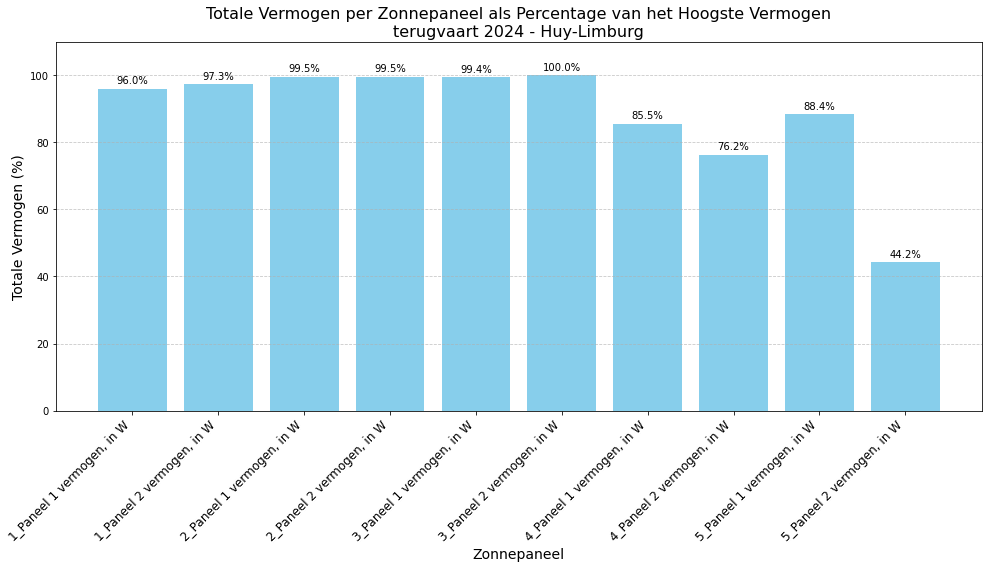


Top 5 panelen die worden uitgesloten van de instantane vermogensplot voor Huy-Limburg:
3_Paneel 2 vermogen, in W
2_Paneel 2 vermogen, in W
2_Paneel 1 vermogen, in W
3_Paneel 1 vermogen, in W
1_Paneel 2 vermogen, in W


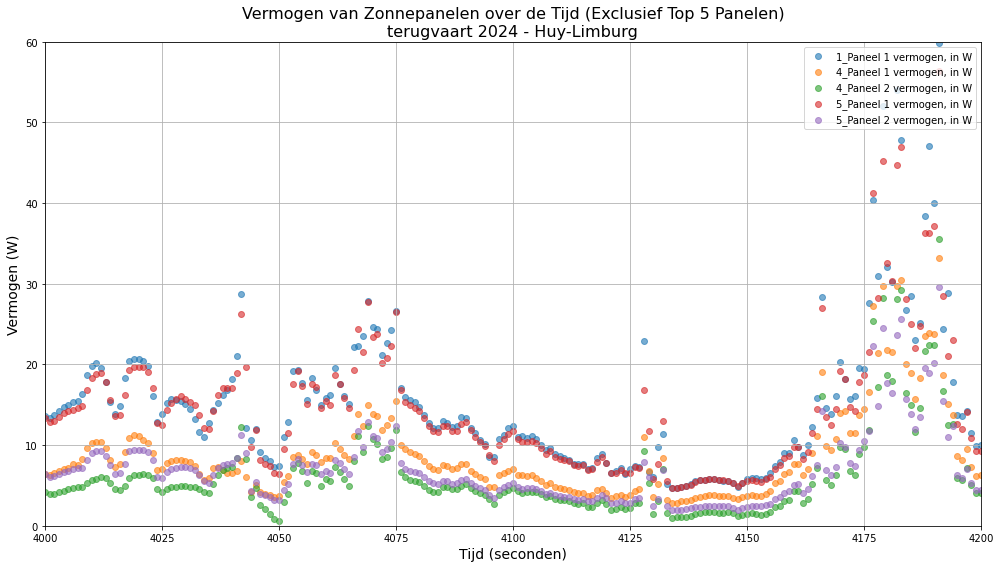

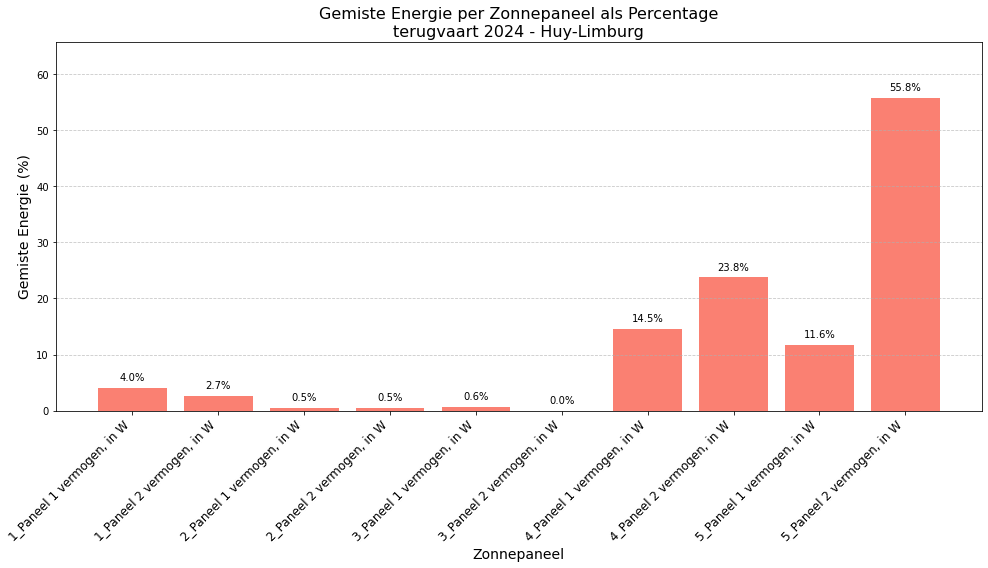


Combined Data voor Gecombineerde Grafiek voor Huy-Limburg:
                       Paneel  Prestaties (%)  Gemiste Energie (%)
0   1_Paneel 1 vermogen, in W       95.955272             0.000000
1   1_Paneel 2 vermogen, in W       97.318182             0.000000
2   2_Paneel 1 vermogen, in W       99.495299             0.000000
3   2_Paneel 2 vermogen, in W       99.515793             0.000000
4   3_Paneel 1 vermogen, in W       99.384320             0.000000
5   3_Paneel 2 vermogen, in W      100.000000             0.000000
6   4_Paneel 1 vermogen, in W       85.476463             0.000000
7   4_Paneel 2 vermogen, in W       76.228488             0.000000
8   5_Paneel 1 vermogen, in W       88.354466             0.000000
9   5_Paneel 2 vermogen, in W       44.188542             0.000000
10                      Total        0.000000           114.083175


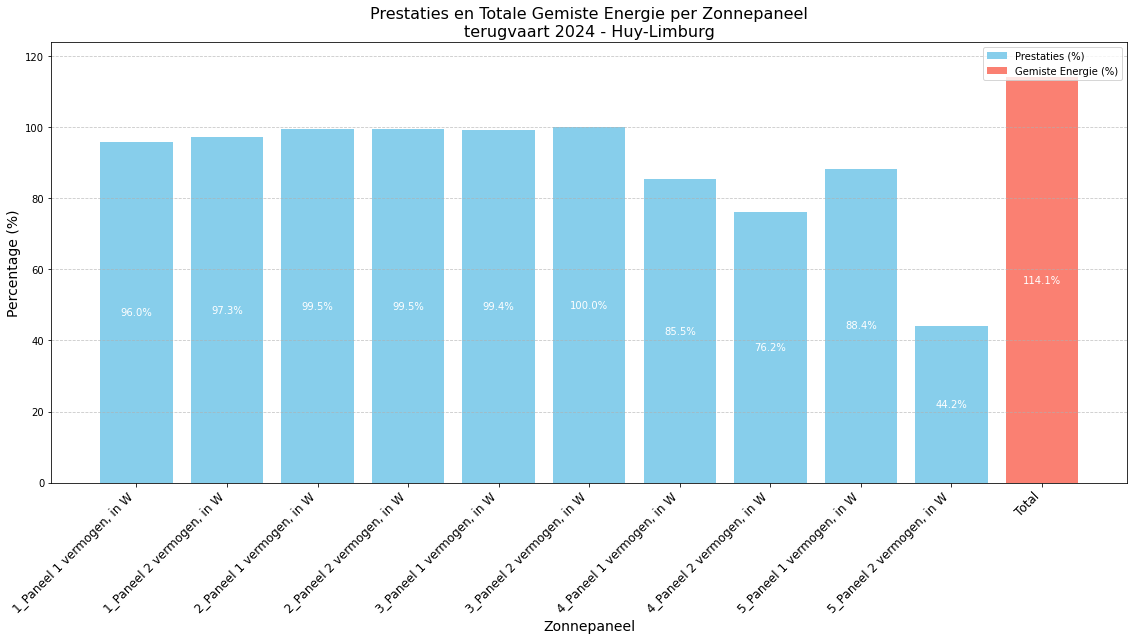

In [10]:
process_and_plot(datasets[0],df=merged_df1)